<a href="https://colab.research.google.com/github/shruti9130/Fundamental/blob/main/hand_wrriten_digit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand written digit prediction- classification Analysis**

 the digit dataset consists of 8*8 pixel images od digits.the images attribute of the dataset stores 8x8 arrays of grayscale values for each image. we will use these array to visualize the first 4 image.the target attribute of the database stores the digit each image represents

**import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

**import data**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

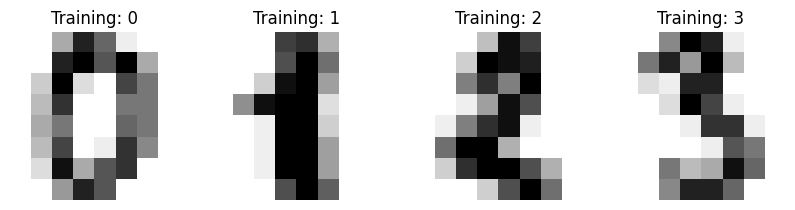

In [ ]:
_, axes =  plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

**Data processing**

# Flatten image

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

**scalling image** **data**

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

0.00390625

In [ ]:
data[0]

array([0.        , 0.        , 0.0012207 , 0.00317383, 0.00219727,
       0.00024414, 0.        , 0.        , 0.        , 0.        ,
       0.00317383, 0.00366211, 0.00244141, 0.00366211, 0.0012207 ,
       0.        , 0.        , 0.00073242, 0.00366211, 0.00048828,
       0.        , 0.00268555, 0.00195312, 0.        , 0.        ,
       0.00097656, 0.00292969, 0.        , 0.        , 0.00195312,
       0.00195312, 0.        , 0.        , 0.0012207 , 0.00195312,
       0.        , 0.        , 0.00219727, 0.00195312, 0.        ,
       0.        , 0.00097656, 0.00268555, 0.        , 0.00024414,
       0.00292969, 0.00170898, 0.        , 0.        , 0.00048828,
       0.00341797, 0.0012207 , 0.00244141, 0.00292969, 0.        ,
       0.        , 0.        , 0.        , 0.00146484, 0.00317383,
       0.00244141, 0.        , 0.        , 0.        ])

# Train test split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

# Predict Test Data

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([8, 4, 4, 8, 7, 7, 9, 7, 7, 8, 1, 1, 6, 3, 1, 9, 1, 9, 2, 3, 8, 3,
       9, 3, 6, 3, 1, 6, 2, 5, 6, 5, 6, 2, 1, 6, 1, 5, 7, 8, 1, 0, 8, 4,
       4, 0, 1, 5, 9, 9, 5, 1, 1, 3, 1, 4, 4, 0, 7, 7, 3, 6, 0, 9, 7, 8,
       3, 6, 2, 0, 6, 0, 6, 2, 7, 4, 1, 0, 4, 2, 3, 7, 0, 0, 9, 5, 2, 4,
       8, 8, 3, 9, 5, 0, 0, 3, 9, 5, 4, 1, 5, 0, 3, 7, 9, 4, 0, 7, 1, 9,
       0, 4, 1, 0, 6, 2, 7, 4, 3, 0, 7, 0, 4, 7, 1, 3, 2, 4, 0, 8, 4, 4,
       9, 2, 1, 3, 0, 5, 6, 4, 2, 9, 4, 8, 0, 5, 0, 2, 5, 8, 5, 3, 2, 1,
       0, 2, 8, 3, 0, 0, 9, 6, 3, 9, 5, 9, 9, 1, 1, 0, 2, 6, 3, 5, 6, 1,
       4, 3, 8, 8, 9, 0, 4, 4, 6, 4, 3, 8, 5, 9, 2, 8, 3, 1, 0, 9, 2, 0,
       4, 5, 6, 6, 2, 8, 1, 2, 4, 5, 3, 6, 7, 0, 1, 1, 8, 3, 5, 9, 5, 6,
       9, 3, 7, 7, 6, 4, 4, 8, 6, 8, 5, 9, 3, 1, 0, 0, 7, 3, 2, 5, 9, 6,
       5, 0, 2, 5, 2, 4, 8, 8, 7, 8, 1, 2, 0, 8, 2, 4, 3, 3, 2, 1, 9, 5,
       9, 6, 6, 7, 1, 6, 5, 1, 2, 8, 2, 0, 4, 7, 6, 0, 4, 3, 1, 6, 6, 4,
       2, 6, 4, 7, 3, 9, 3, 3, 8, 2, 0, 5, 2, 3, 3,

# Model Accuracy


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)


array([[58,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  0],
       [ 0,  5,  0,  0,  0,  1,  0,  0, 48,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 50]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       0.92      1.00      0.96        57
           2       1.00      0.98      0.99        53
           3       0.98      0.96      0.97        54
           4       1.00      0.98      0.99        60
           5       0.96      1.00      0.98        44
           6       1.00      0.98      0.99        52
           7       0.95      1.00      0.97        56
           8       0.98      0.89      0.93        54
           9       1.00      0.96      0.98        52

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [ ]:
from google.colab import drive
drive.mount('/content/drive')